In [10]:
%matplotlib notebook

%load_ext autoreload
%autoreload 2

#Import Libraries
import tensorflow as tf
import numpy as np
import math
import os
import matplotlib
import matplotlib.pyplot as plt
import datetime
import time

import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

from sklearn.metrics import recall_score, precision_score

from models import save_model, generator, generate_model, plot_performance

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
X_load = np.load('../data/processed_data/m4015_session2/X_serial.npy')
Y_load = np.load('../data/processed_data/m4015_session2/y_serial.npy')

res = tf.one_hot(Y_load, depth=2)
with tf.Session() as sess:
    Y_load = (sess.run(res))

split_index = int(X_load.shape[0]*0.8)
    
X_train = X_load[:split_index]
Y_train = Y_load[:split_index]
X_val = X_load[split_index:]
Y_val = Y_load[split_index:]


class_weight = {0: 1., 1: 50.,}

<IPython.core.display.Javascript object>


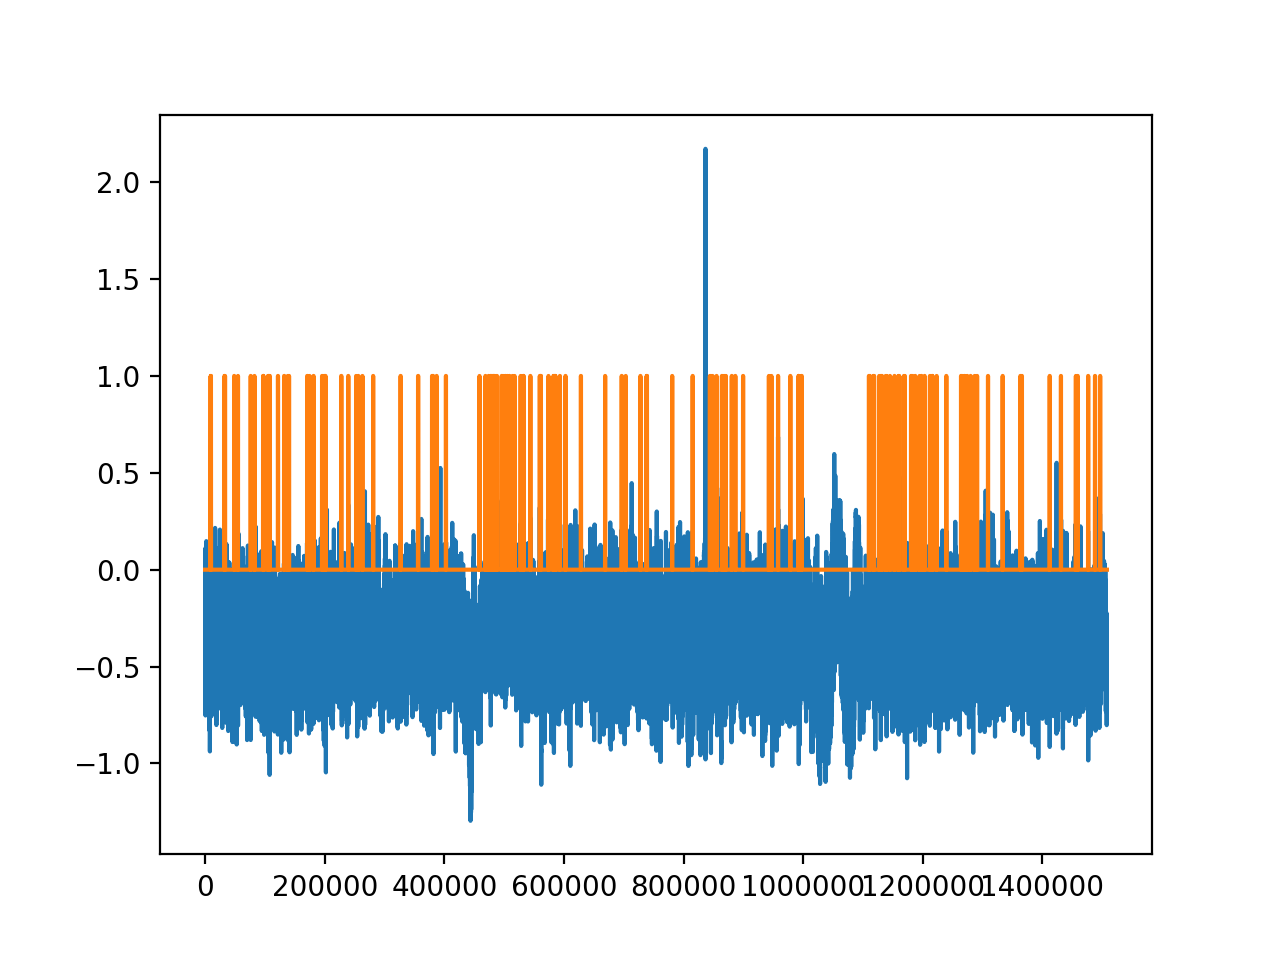

In [12]:
plt.figure()
plt.plot(X_load)
plt.plot(np.argmax(Y_load, axis=1))
plt.show()

In [13]:
batch_size = 1000
n_hidden = 100
n_dim = 1
input_shape = (n_hidden, n_dim)


model = generate_model(input_shape)

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 1)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 100, 6)            48        
_________________________________________________________________
average_pooling1d_1 (Average (None, 50, 6)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 50, 12)            516       
_________________________________________________________________
average_pooling1d_2 (Average (None, 25, 12)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 25, 12)            1020      
_________________________________________________________________
average_pooling1d_3 (Average (None, 12, 12)            0         
__________

In [14]:
train_generator = generator(X_train, Y_train, batch_size, n_hidden)
validate_generator = generator(X_val, Y_val, batch_size, n_hidden)

history = model.fit_generator(train_generator,
                              steps_per_epoch=1000,
                              epochs=20, 
                              verbose=1,
                              validation_data=validate_generator,
                              validation_steps=1000,
                              class_weight=class_weight, )

save_model(model)

Epoch 1/20
1000/1000 [==============================] - 92s 92ms/step - loss: 1.4476 - acc: 0.1127 - val_loss: 0.6760 - val_acc: 0.9137
Epoch 2/20
1000/1000 [==============================] - 105s 105ms/step - loss: 1.3910 - acc: 0.6296 - val_loss: 0.6206 - val_acc: 0.8701
Epoch 3/20
1000/1000 [==============================] - 86s 86ms/step - loss: 1.3880 - acc: 0.7038 - val_loss: 0.7065 - val_acc: 0.6866
Epoch 4/20
1000/1000 [==============================] - 82s 82ms/step - loss: 1.1713 - acc: 0.7523 - val_loss: 0.3388 - val_acc: 0.9218
Epoch 5/20
1000/1000 [==============================] - 96s 96ms/step - loss: 0.7439 - acc: 0.9046 - val_loss: 0.1906 - val_acc: 0.9541
Epoch 6/20
1000/1000 [==============================] - 93s 93ms/step - loss: 0.7240 - acc: 0.9072 - val_loss: 0.1997 - val_acc: 0.9564
Epoch 7/20
1000/1000 [==============================] - 87s 87ms/step - loss: 0.7103 - acc: 0.9075 - val_loss: 0.2848 - val_acc: 0.9396
Epoch 8/20
1000/1000 [========================

<IPython.core.display.Javascript object>


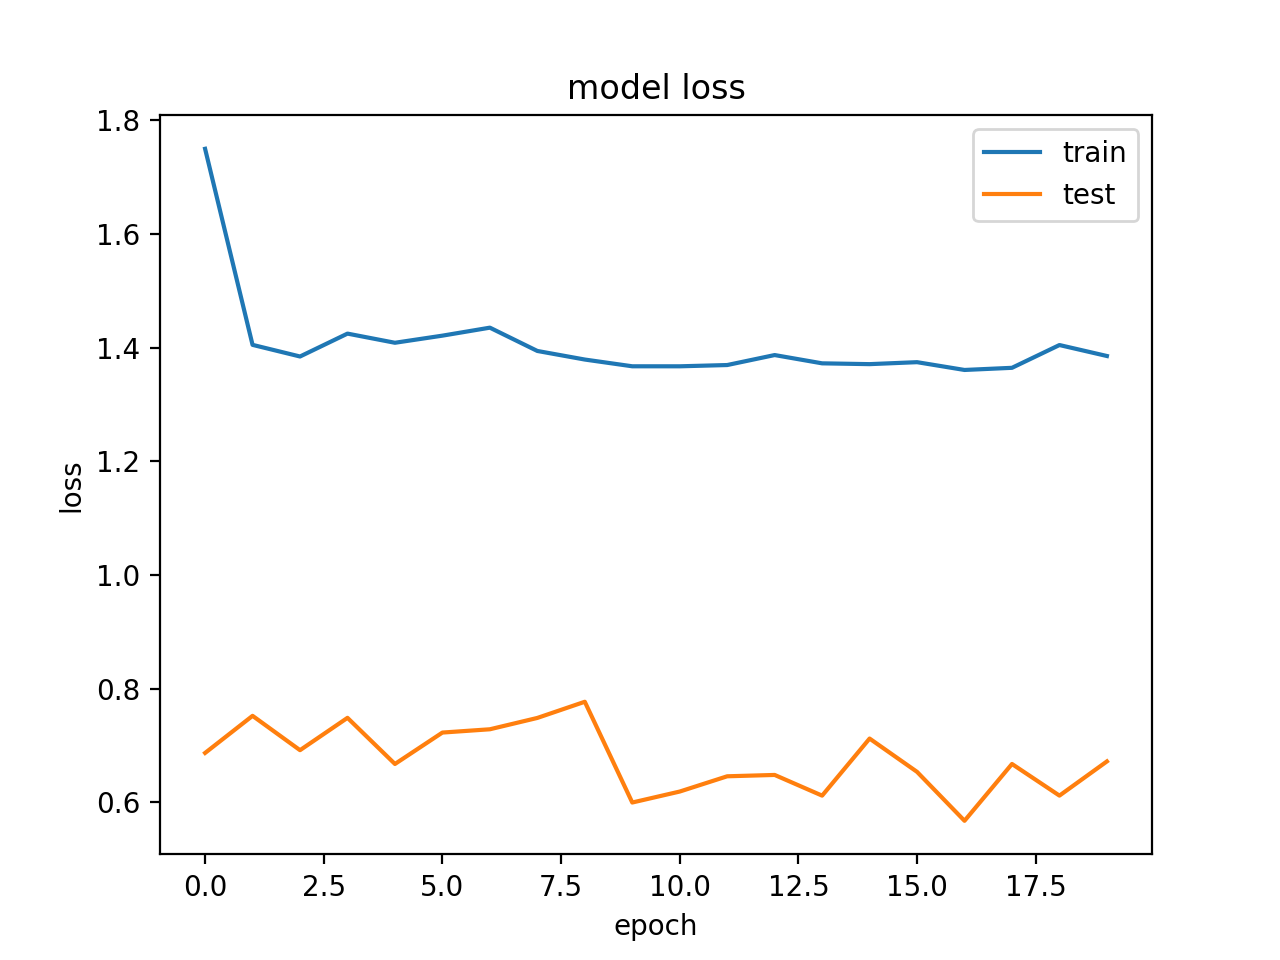

<IPython.core.display.Javascript object>


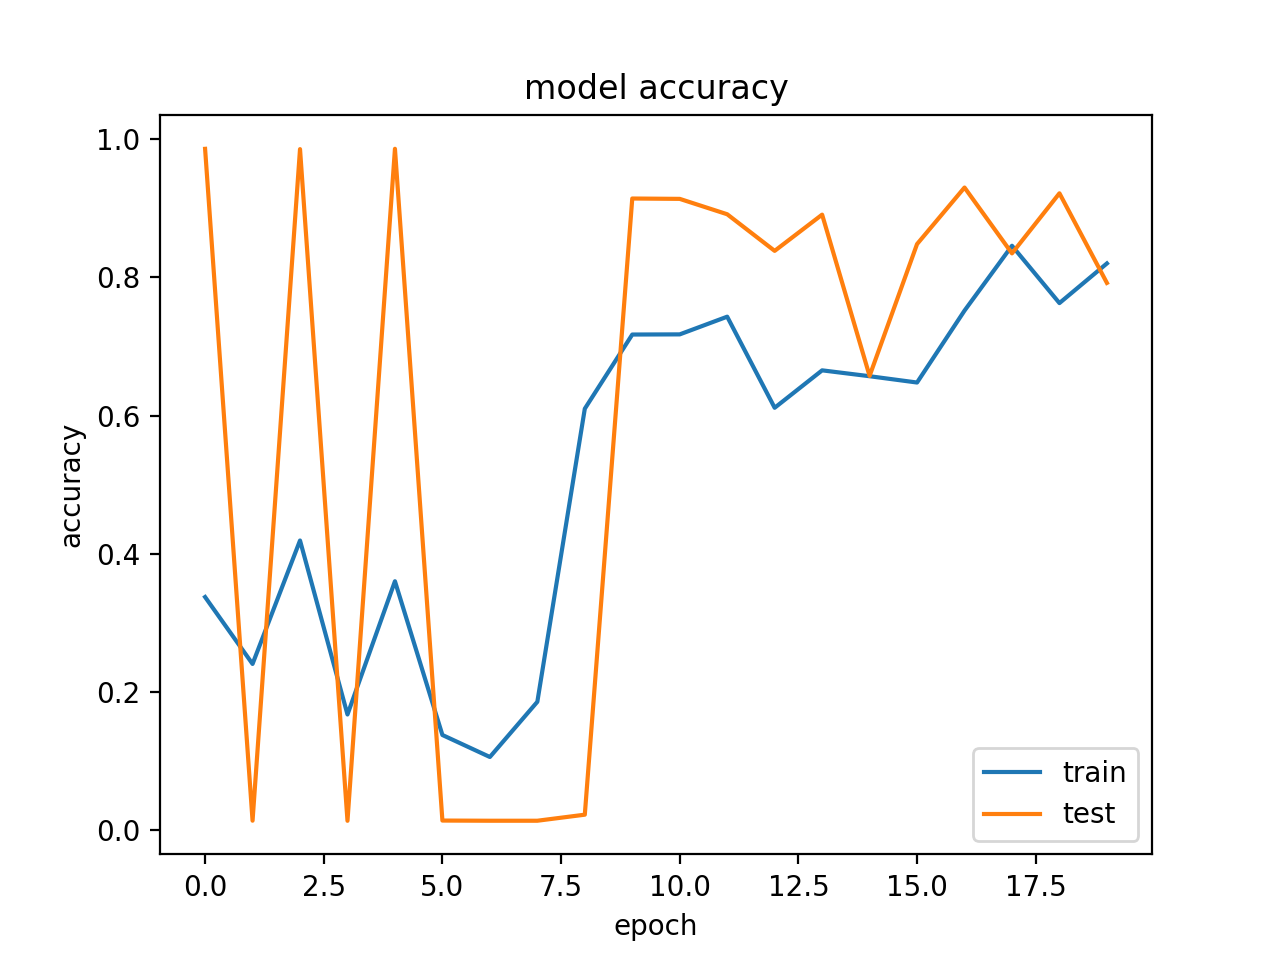

In [9]:
plot_performance(history)

In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from models import make_accuracy_matrix_plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[0.6319534  0.36804652]
 [0.45178145 0.54821855]
 [0.59840554 0.40159446]
 ...
 [0.6481891  0.35181087]
 [0.651307   0.348693  ]
 [0.61376935 0.38623065]]


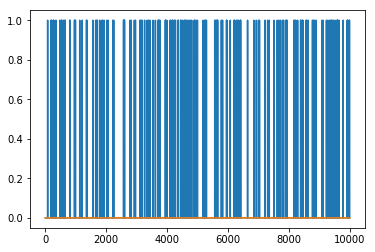

/Users/astasik/Desktop/ANN_Ripple_Detection/ANNs/models.py:138: RuntimeWarning: invalid value encountered in long_scalars
  res_matrix[i,j] = np.sum(mask_true*mask_reco) / np.sum(mask_reco)


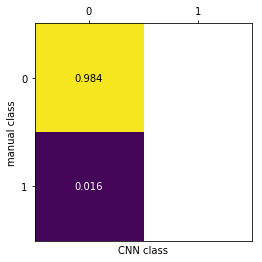

In [8]:
validate_generator = generator(X_val, Y_val, batch_size*10, n_hidden)

# make_accuracy_matrix_plot(model, validate_generator)
make_accuracy_matrix_plot(model, validate_generator, ref='est')

In [9]:
save_dir = 'plots'
if not os.path.exists(save_dir):
        os.makedirs(save_dir)

second_dir = 'simple'
save_dir = os.path.join(save_dir, second_dir)  
if not os.path.exists(save_dir):
        os.makedirs(save_dir)




In [10]:
X = X_val
y = np.argmax(Y_val, axis=1)
t = np.arange(X.shape[0])

n_slices = X.shape[0] - n_hidden

all_y = np.zeros((n_slices, 2))

for i in range(n_slices):
    x_input = np.reshape(X[i:i+n_hidden], (1, n_hidden, 1))
    all_y[i] = model.predict(x_input)
    


In [11]:
y_pred_int = np.argmax(all_y, axis=1)

mask = all_y[:,1]>0.99
y_pred_int = np.array(mask, dtype=int)

y_res = np.zeros_like(t)
y_res[int(n_hidden/2):int(-n_hidden/2)] = y_pred_int

In [12]:
y_scale = np.zeros_like(t)
y_scale[int(n_hidden/2):int(-n_hidden/2)] = all_y[:,1]

y.shape, y_scale.shape

((301562,), (301562,))

<IPython.core.display.Javascript object>


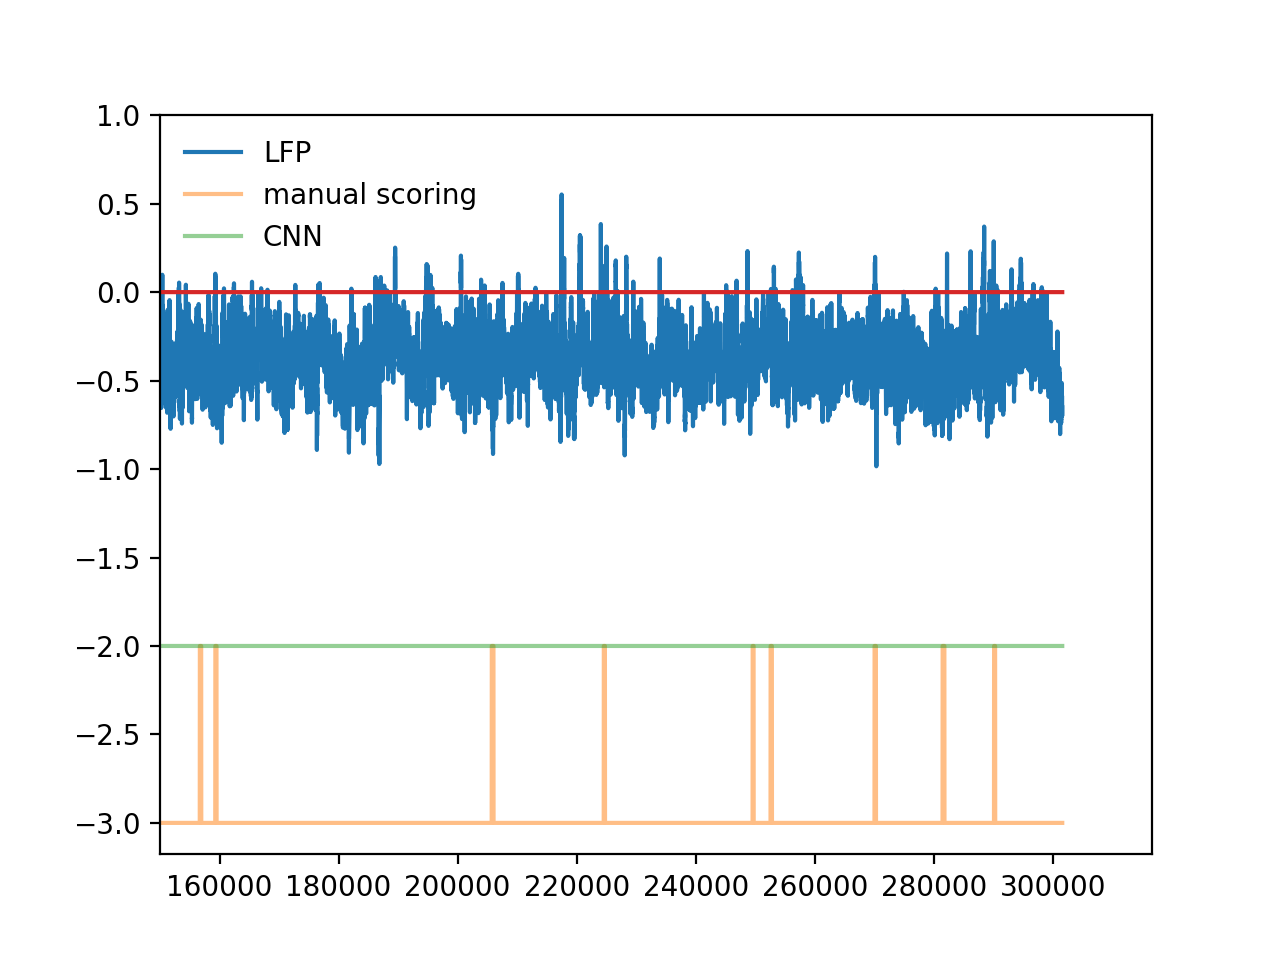

In [13]:
%matplotlib notebook

plt.figure()
plt.plot(t, X, label='LFP')
plt.plot(t, y-3, alpha=0.5, label='manual scoring')
plt.plot(t, y_res-2, alpha=0.5, label='CNN')
plt.plot(t, y_scale)
plt.xlim(150000, None)
plt.ylim(None, 1)
plt.legend(framealpha=0)
plt.savefig('plots/nice.pdf')
plt.show()

In [14]:
y_scale[int(n_hidden/2):int(-n_hidden/2)] = all_y[:,1]

In [15]:
y_scale[int(n_hidden/2):int(-n_hidden/2)]

array([0, 0, 0, ..., 0, 0, 0])

<IPython.core.display.Javascript object>


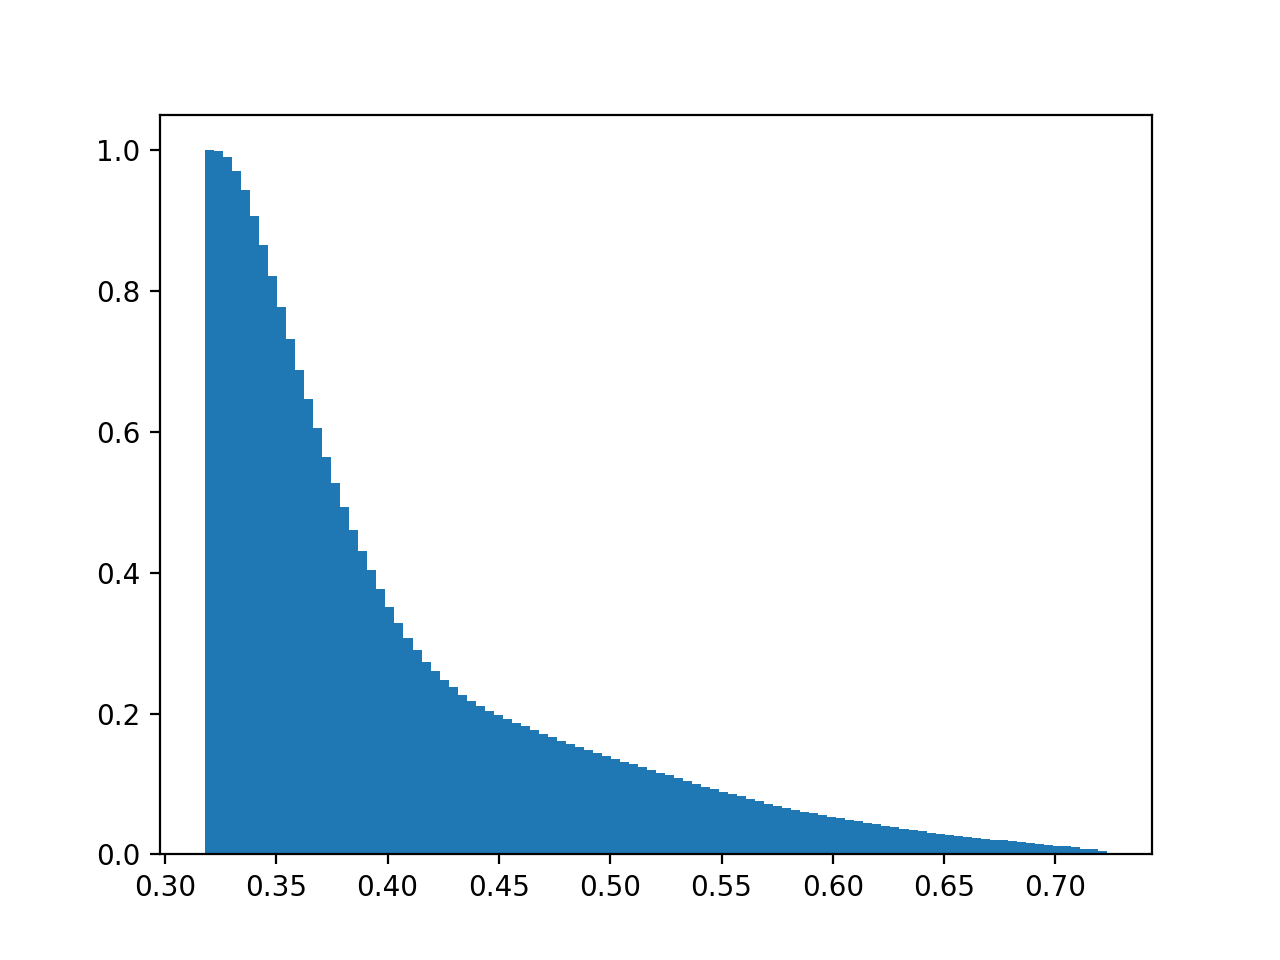

In [16]:
plt.figure()
plt.hist(all_y[:,1], bins=100, cumulative=-1, density=True)
plt.show()

In [17]:
all_y

array([[0.61532307, 0.38467699],
       [0.61569136, 0.38430867],
       [0.61595261, 0.38404745],
       ...,
       [0.5862577 , 0.41374227],
       [0.58605647, 0.4139435 ],
       [0.58586156, 0.4141385 ]])